In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, 
                    epochs=50, batch_size = 16,
                    validation_split=0.25)

Epoch 1/50


2023-07-25 17:04:51.617930: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19/19 [==============================] - 0s 6ms/step - loss: 552.9155 - mae: 21.8352 - val_loss: 665.3630 - val_mae: 23.7887
Epoch 2/50
19/19 [==============================] - 0s 1ms/step - loss: 508.3394 - mae: 20.8032 - val_loss: 616.9571 - val_mae: 22.7983
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 458.7163 - mae: 19.6074 - val_loss: 543.7488 - val_mae: 21.2519
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 380.6371 - mae: 17.6524 - val_loss: 433.2461 - val_mae: 18.6898
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 273.2761 - mae: 14.6219 - val_loss: 296.7829 - val_mae: 14.9140
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 160.6987 - mae: 10.7429 - val_loss: 172.2248 - val_mae: 10.4124
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 85.9121 - mae: 7.3511 - val_loss: 108.7781 - val_mae: 8.1493
Epoch 8/50
19/19 [==============================] - 0s 2ms/ste

/var/folders/4w/mvrr1vrs1h7_1rt6w70vx4zm0000gn/T/ipykernel_4918/2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


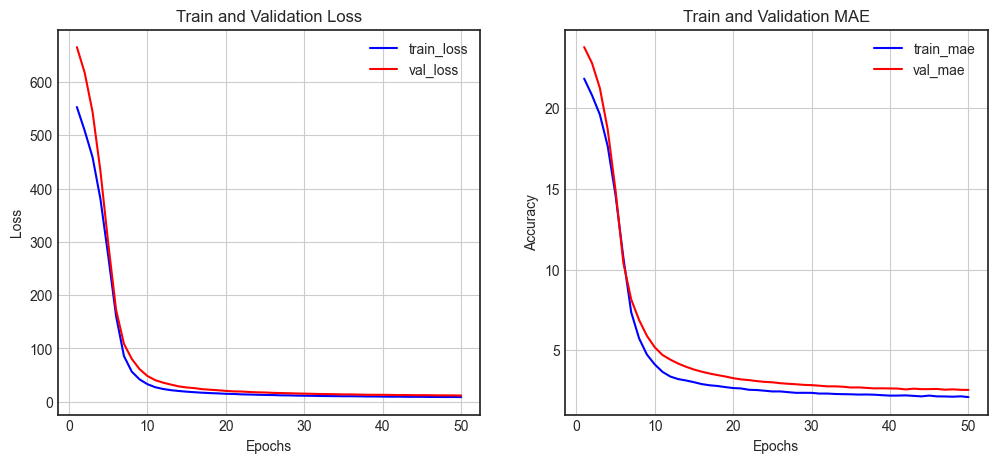

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 895us/step - loss: 21.2094 - mae: 3.1144


[21.209388732910156, 3.114434242248535]